# Descriptive statistics and basic analysis

This notebook aims to perform descriptive statistics and basic data analysis on Reddit dataset.

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
import os
import glob
from urllib import parse

## Loading the country specific dataset

## Switerland

In [6]:
## Submissions
path = "../data/reddit_swiss_submissions_fullcorpus"
all_files = glob.glob(os.path.join(path, "part-*"))
dfs_swiss = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

## Comments
path = '../data'
comment_folder = glob.glob(os.path.join(path, "reddit_uk_comments_*"))
comments_files = [glob.glob(os.path.join(folder, "part-*")) for folder in comment_folder]
comments_files_all = [file for sublist in comments_files for file in sublist]
dfc_swiss = pd.concat((pd.read_csv(f) for f in comments_files_all), ignore_index=True)

## UK

In [37]:
## Submissions
path = "../data/reddit_uk_submissions_fullcorpus"
all_files = glob.glob(os.path.join(path, "part-*"))
dfs_uk = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

## Comments
#path = '../data'
#comment_folder = glob.glob(os.path.join(path, "reddit_uk_comments_*"))
#comments_files = [glob.glob(os.path.join(folder, "part-*")) for folder in comment_folder]
#comments_files_all = [file for sublist in comments_files for file in sublist]
#dfc_uk = pd.concat((pd.read_csv(f) for f in comments_files_all), ignore_index=True)

## EU

In [38]:
## Submissions
path = "../data/reddit_europe_submissions_fullcorpus"
all_files = glob.glob(os.path.join(path, "part-*"))
dfs_eu = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

In [246]:

germany_subreddit_list = ['germany', 'de', 'German', 'GermanPractice', 'GermanFacts', 'GermanConversation',                  ## germany
     'SCHLAND', 'germanyusa', 'DEjobs', 'bundesliga', 'GermanyPics', 'germusic', 'de_punk', 'germanrap', 'NDH']                 ## germany
dfs_de = dfs_eu[dfs_eu['subreddit'].isin(germany_subreddit_list)]

france_subreddit_list  = ['blagues', 'cinemacinema', 'france', 'FrancePics', 'frenchelectro', 'Frenchhistory', 'guessthefrenchmovie',      ## france
     'Ligue1', 'Livres', 'musiquefrancaise', 'paris', 'pedale', 'philosophie', 'Politique', 'rance', 'ScienceFr', 'SocialFrance']## france
dfs_fr = dfs_eu[dfs_eu['subreddit'].isin(france_subreddit_list)]


italy_subreddit_list  = ['Calcio', 'ITAGLIA', 'Italianhistory', 'ITALIANMUSIC', 'italy', 'ItalyPhotos', 'Libri', 'Abruzzo', 'Apulia', 'bari',       ## italy
     'Basilicata', 'bologna', 'Calabria', 'Campania', 'Catania', 'emilia_romagna', 'firenze', 'friuli', 'Genova', 'Italia',     ## italy
     'lazio', 'Liguria', 'lombardia', 'Lombardy', 'marche', 'messina', 'milano', 'Modena', 'molise', 'Naples_Italy', 'napoli',  ## italy
     'padova', 'Palermo', 'Perugia', 'Piedmont', 'piemonte', 'Pisa', 'puglia', 'roma', 'rome', 'romesocialclub', 'Sardegna',    ## italy
     'Sardinia', 'Sicilia', 'sicily', 'Siracusa', 'torino', 'Toscana', 'trentino_alto_adige', 'trentod', 'Trieste',             ## italy
     'tuscany', 'Umbria', 'valle_daosta', 'Veneto', 'Venezia']                                                                 ## italy
dfs_it = dfs_eu[dfs_eu['subreddit'].isin(italy_subreddit_list)]

spain_subreddit_list   =  ['Barcelona', 'EPANA', 'es', 'futbol', 'Granada', 'LaLiga', 'Madrid', 'spain', 'Andalucia', 'SpanishHistory']     ## spain 
dfs_es = dfs_eu[dfs_eu['subreddit'].isin(spain_subreddit_list)]

## Growth in Reddit usage: Number of submissions per year

In [ ]:
## Number of submissions per year
from datetime import datetime
dfs_swiss['created_datetime'] = [datetime.fromtimestamp(t) for t in dfs_swiss['created_utc'].astype(int)]
dfs_swiss['created_year'] = [dfs_swiss['created_datetime'][i].year for i in range(len(dfs_swiss))]
num_sub_swiss = dfs_swiss.groupby(['created_year'])['title'].count().values

dfs_uk['created_datetime'] = [datetime.fromtimestamp(t) for t in dfs_uk['created_utc'].astype(int)]
dfs_uk['created_year'] = [dfs_uk['created_datetime'][i].year for i in range(len(dfs_uk))]
num_sub_uk = dfs_uk.groupby(['created_year'])['title'].count().values

dfs_de['created_datetime'] = [datetime.fromtimestamp(t) for t in dfs_de['created_utc'].astype(int)]
dfs_de['created_year'] = [dfs_de.iloc[i]['created_datetime'].year for i in range(len(dfs_de))]
num_sub_de = dfs_de.groupby(['created_year'])['title'].count().values

dfs_fr['created_datetime'] = [datetime.fromtimestamp(t) for t in dfs_fr['created_utc'].astype(int)]
dfs_fr['created_year'] = [dfs_fr.iloc[i]['created_datetime'].year for i in range(len(dfs_fr))]
num_sub_fr = dfs_fr.groupby(['created_year'])['title'].count().values

dfs_es['created_datetime'] = [datetime.fromtimestamp(t) for t in dfs_es['created_utc'].astype(int)]
dfs_es['created_year'] = [dfs_es.iloc[i]['created_datetime'].year for i in range(len(dfs_es))]
num_sub_ed = dfs_es.groupby(['created_year'])['title'].count().values

dfs_it['created_datetime'] = [datetime.fromtimestamp(t) for t in dfs_it['created_utc'].astype(int)]
dfs_it['created_year'] = [dfs_it.iloc[i]['created_datetime'].year for i in range(len(dfs_it))]
num_sub_it = dfs_it.groupby(['created_year'])['title'].count().values

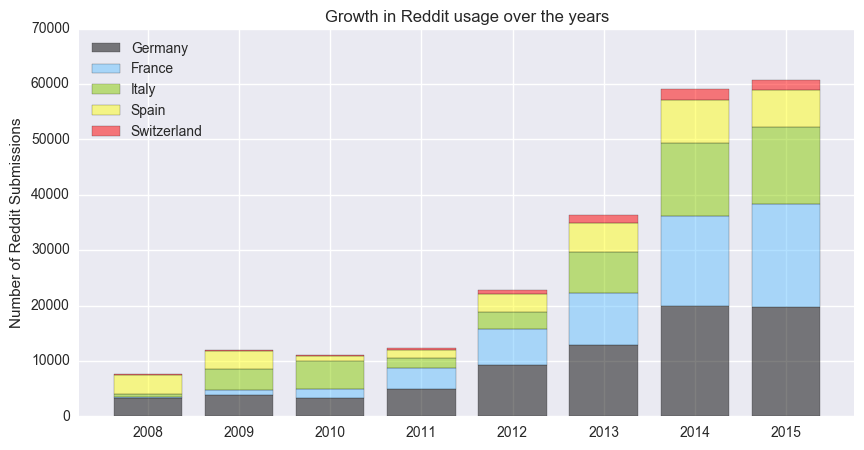

In [356]:
df1 = pd.DataFrame()
df1['year'] = ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
df1['Switzerland'] = num_sub_swiss
df1['UK'] = num_sub_uk
df1['Germany'] = num_sub_de[2:]
df1['France'] = num_sub_fr
df1['Italy'] = num_sub_it
df1['Spain'] = num_sub_ed[2:]
df = df1

# Create the general blog and the "subplots" i.e. the bars
f, ax1 = plt.subplots(1, figsize=(10,5))

# Set the bar width
bar_width = 0.75

# positions of the left bar-boundaries
bar_l = [i+1 for i in range(len(df['UK']))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create a bar plot, in position bar_1
ax1.bar(bar_l, 
        # using the pre_score data
        df['Germany'], 
        # set the width
        width=bar_width,
        # with the label pre score
        label='Germany', 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#000000')

# Create a bar plot, in position bar_1
ax1.bar(bar_l, 
        # using the mid_score data
        df['France'], 
        # set the width
        width=bar_width,
        # with pre_score on the bottom
        bottom=df['Germany'], 
        # with the label mid score
        label='France', 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#66c2ff')

# Create a bar plot, in position bar_1
ax1.bar(bar_l, 
        # using the post_score data
        df['Italy'], 
        # set the width
        width=bar_width,
        # with pre_score and mid_score on the bottom
        bottom=[i+j for i,j in zip(df['Germany'],df['France'])], 
        # with the label post score
        label='Italy', 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#88cc00')

# Create a bar plot, in position bar_1
ax1.bar(bar_l, 
        # using the post_score data
        df['Spain'], 
        # set the width
        width=bar_width,
        # with pre_score and mid_score on the bottom
        bottom=[i+j+k for i,j,k in zip(df['Germany'],df['France'],df['Italy'])], 
        # with the label post score
        label='Spain', 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#ffff1a')

# Create a bar plot, in position bar_1
ax1.bar(bar_l, 
        # using the post_score data
        df['Switzerland'], 
        # set the width
        width=bar_width,
        # with pre_score and mid_score on the bottom
        bottom=[i+j+k+l for i,j,k,l in zip(df['Germany'],df['France'],df['Italy'],df['Spain'])], 
        # with the label post score
        label='Switzerland', 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#ff0000')

# set the x ticks with names
plt.xticks(tick_pos, df['year'])

# Set the label and legends
ax1.set_ylabel("Number of Reddit Submissions")
#ax1.set_xlabel("Test Subject")
ax1.set_title('Growth in Reddit usage over the years')
plt.legend(loc='upper left')

# Set a buffer around the edge
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.savefig("../figures/num_submissions_allcountries_allyears.png")

## Popular subreddits 

### Switzerland

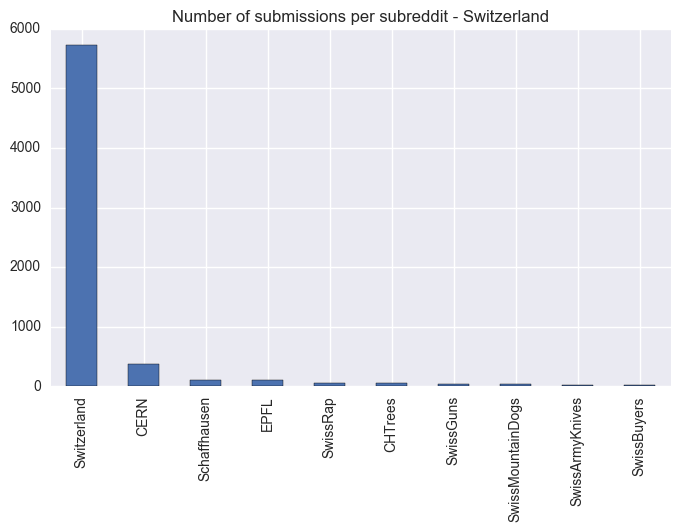

In [239]:
dfs_swiss['subreddit'].value_counts()[:10].plot(kind='bar', title='Number of submissions per subreddit - Switzerland')
plt.gcf().subplots_adjust(bottom=0.25)
plt.savefig('../figures/num_submissions_per_subreddit_swiss.png')

### UK

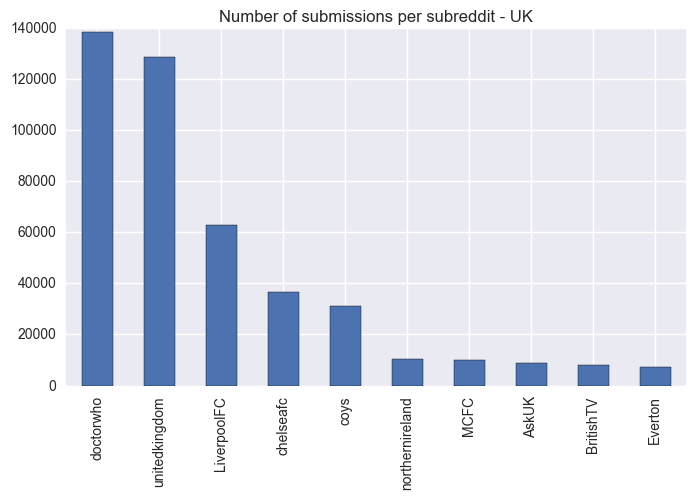

In [240]:
dfs_uk['subreddit'].value_counts()[:10].plot(kind='bar', title='Number of submissions per subreddit - UK')
plt.gcf().subplots_adjust(bottom=0.25)
plt.savefig('../figures/num_submissions_per_subreddit_uk.png')

### Germany

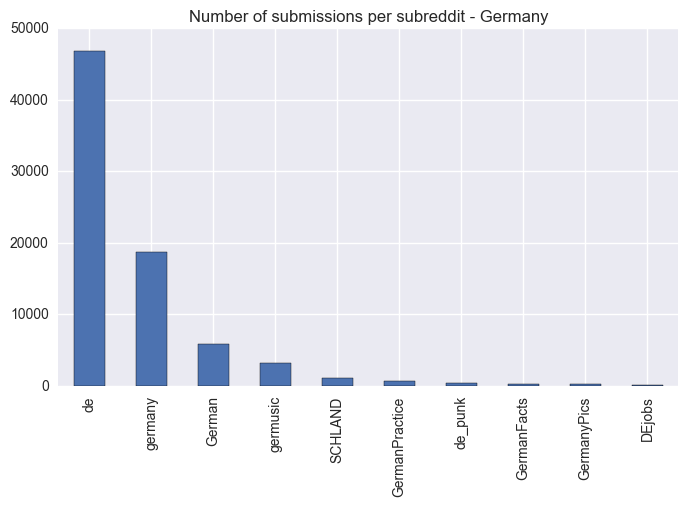

In [241]:
dfs_de['subreddit'].value_counts()[:10].plot(kind='bar', title='Number of submissions per subreddit - Germany')
plt.gcf().subplots_adjust(bottom=0.25)
plt.savefig('../figures/num_submissions_per_subreddit_de.png')

### France

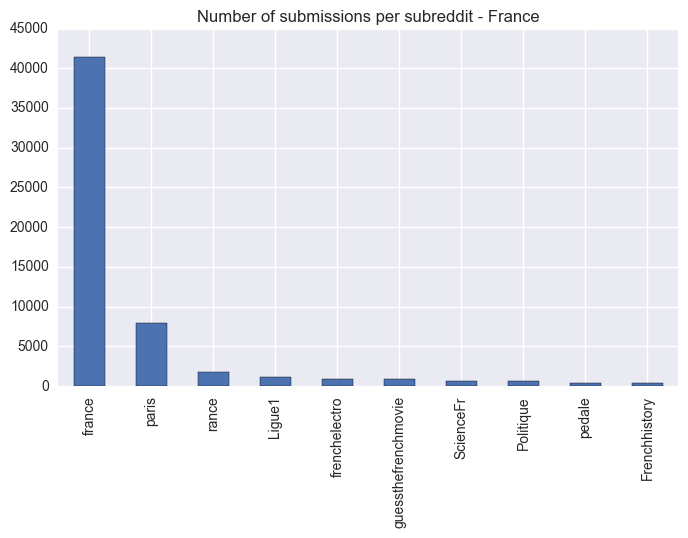

In [244]:
dfs_fr['subreddit'].value_counts()[:10].plot(kind='bar', title='Number of submissions per subreddit - France')
plt.gcf().subplots_adjust(bottom=0.25)
plt.savefig('../figures/num_submissions_per_subreddit_fr.png')

### Spain

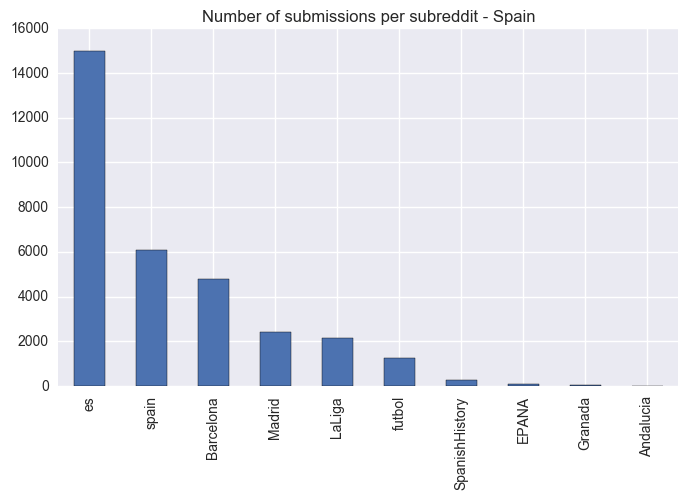

In [247]:
dfs_es['subreddit'].value_counts()[:10].plot(kind='bar', title='Number of submissions per subreddit - Spain')
plt.gcf().subplots_adjust(bottom=0.25)
plt.savefig('../figures/num_submissions_per_subreddit_es.png')

### Italy

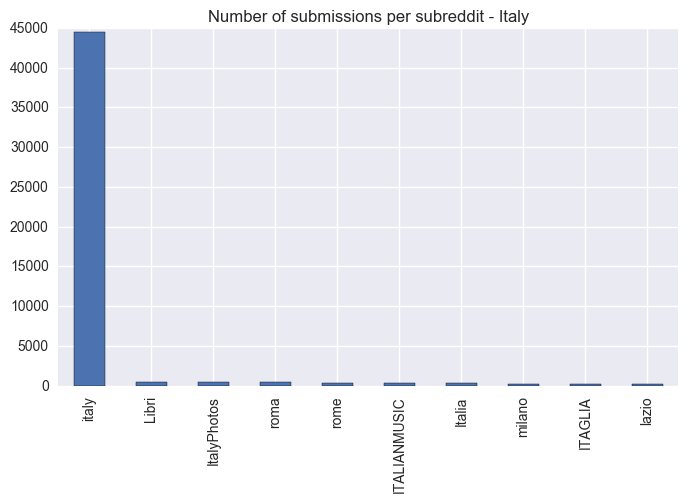

In [248]:
dfs_it['subreddit'].value_counts()[:10].plot(kind='bar', title='Number of submissions per subreddit - Italy')
plt.gcf().subplots_adjust(bottom=0.25)
plt.savefig('../figures/num_submissions_per_subreddit_it.png')

## Most popular submissions - highest number of comments

### Switzerland

In [294]:
print("POPULAR") 
dfs_popularsub_swiss = dfs_swiss.sort_values(by='num_comments', ascending=False)
for i in range(20):
    print(dfs_popularsub_swiss.iloc[i]['title'])
print("=========UP VOTES========") 
dfs_upvotes_swiss = dfs_swiss.sort_values(by='ups', ascending=False)
for i in range(20):
    print(dfs_upvotes_swiss.iloc[i]['title'])

POPULAR
Anyone else genuinely concerned about the Masseneinwanderungsinitiative?
How to own a gun in Switzerland for dummies.
Probably the most deliberately racist political ad I've ever seen
Things that are illegal on Switzerland that expats might be unaware of?
What does /r/Switzerland think about the amount of homeopathic and "natural" medicine being sold at Swiss pharmacies?
What is it with Döner in Switzerland?
Swiss reject public health insurance plan
American? Thinking of moving to Switzerland?
American here.You guys have a higher Freedom of the Press rating than the US, you aren't part of the EU,most of your energy comes from renewable sources,you remain neutral in wars, and you have bank secrecy
Swisscom Reddit Problems?
Peace-Loving Sweden And Switzerland Are Among Top Arms Exporters Per Capita In The World
Former Fed Reserve Chief Greenspan understands the value of gold. Do you?
What foreign products do you wish were in Switzerland that are currently unavailable or difficult

### UK

In [295]:
dfs_popularsub_uk = dfs_uk.sort_values(by='num_comments', ascending=False)
for i in range(20):
    print(dfs_popularsub_uk.iloc[i]['title'])
print("=========UP VOTES========") 
dfs_upvotes_uk = dfs_uk.sort_values(by='ups', ascending=False)
for i in range(20):
    print(dfs_upvotes_uk.iloc[i]['title'])

Match Thread: General Election 2015
Doctor Who 50th Anniversary - The Day of the Doctor Discussion Thread
Doctor Who: 7x14 "The Name of the Doctor" Discussion Thread
Doctor Who Christmas Special: The Time of the Doctor Post-Episode Discussion Thread
Doctor Who 8x12: Death in Heaven Post-Episode Discussion Thread
Asylum of the Daleks Season 7 Episode 1
Doctor Who 8x01: Deep Breath Post-Episode Discussion Thread
"The Angels Take Manhattan" Discussion Thread
Doctor Who 8x11: Dark Water Post-Episode Discussion Thread
Random stuff that baffles me as an immigrant
Match Thread: Liverpool Vs Manchester United
Aug. 4th - Doctor Who Announcement Special Thread [SPOILERS]
[The Official Olympics opening ceremony thread!]
Match Thread : Chelsea vs Liverpool (League Cup SF - Leg 2)
[Match Thread] Liverpool vs West Ham
50th Anniversary Special - Day of the Doctor Post-Episode Discussion Thread
Official Closing Ceremony Thread
Doctor Who 8x04: Listen Post-Episode Discussion Thread
Doctor Who 7x07 "The

### Germany

In [296]:
dfs_popularsub_de = dfs_de.sort_values(by='num_comments', ascending=False)
for i in range(20):
    print(dfs_popularsub_de.iloc[i]['title'])
print("=========UP VOTES========") 
dfs_upvotes_de = dfs_de.sort_values(by='ups', ascending=False)
for i in range(20):
    print(dfs_upvotes_de.iloc[i]['title'])

Worst aspect of Germany?
A question to non-germans living in Germany: what are the things that bug you about the country?
TIL es gibt einen bot, der eurer Kommentarverhalten simuliert.
Hallo! Ich würde gern mit der deutschsprachigen Redditgemeinschaft diskutieren und einige Fragen stellen...
Expats in Germany, what is something you wished you were told before arriving?
Living in Germany, what upsets or disturbs you the most?
Living in Germany as a foreigner, what did surprise you the most in the beginning? What are the differences to your home country?
In /r/worldnews waren die Dresdner Anschläge Thema. Selten so Fremdgeschämt.
Der "Scheiße-ist-das-heiß"-Jammerthread
Is Germany really the utopia I keep hearing about?
שלום Israel - Today subexchange with /r/israel
It's the little things (differences between living in the US and Germany)
The unwillingness to learn German for university
Living in Germany, what's amazing about this country compared to your homeland?
"Warum bist du rechts?"

### France

In [297]:
dfs_popularsub_fr = dfs_fr.sort_values(by='num_comments', ascending=False)
for i in range(20):
    print(dfs_popularsub_fr.iloc[i]['title'])
print("=========UP VOTES========") 
dfs_upvotes_fr = dfs_fr.sort_values(by='ups', ascending=False)
for i in range(20):
    print(dfs_upvotes_fr.iloc[i]['title'])

Forum Libre - 29 Apr, 2015
Charlie Hebdo victime d'une attaque à l'arme automatique.
Forum Libre - 20 Apr, 2015
[MAL PARLER] Ici, on parle mal de ton jeu vidéo favori !
Forum Libre - 06 Jul, 2015
Forum Libre - 16 Apr, 2015
Forum Libre - 30 Apr, 2015
"So you want to buy the next Charlie Hebdo issue" megathread
Forum Libre - 22 Apr, 2015
[MAL PARLER] Ici, on parle mal de ton métier
Forum Libre - 28 Jul, 2015
Forum Libre - 13 May, 2015
Forum Libre - 28 Apr, 2015
Forum Libre - 21 Jul, 2015
Forum Libre - 15 Apr, 2015
Forum Libre - 08 Jun, 2015
Forum Libre - 01 Jun, 2015
Forum Libre - 28 May, 2015
Forum Libre - 18 May, 2015
Forum Libre - 27 May, 2015
=========UP VOTES========
WELCOME TO MURICA! ENJOY YOUR FREEDOM!
Charlie Hebdo victime d'une attaque à l'arme automatique.
C'est pour votre bien.
Vive la France!
AMERICA IS HERE TO LIBERATE R/FRANCE!
America is here now Frenchies!
I'D SUBMIT A POST TO THIS SUBREDDIT, BUT 75% OF MY KARMA WOULD BE TAXED
...c'est vrai...
My friend is missing in Fra

### Spain

In [298]:
dfs_popularsub_es = dfs_es.sort_values(by='num_comments', ascending=False)
for i in range(20):
    print(dfs_popularsub_es.iloc[i]['title'])
print("=========UP VOTES========") 
dfs_upvotes_es = dfs_es.sort_values(by='ups', ascending=False)
for i in range(20):
    print(dfs_upvotes_es.iloc[i]['title'])

Please help my friend spite his landlord-- Can anyone identify the location of this stock photo taken in Barcelona? (explanation in comments)
META Catalan nitpickers are ruining this subreddit for everyone
Please help my friend spite his landlord-- Can anyone identify the location of this stock photo taken in Barcelona? (explanation in comments)
Estoy totalmente en contra de la independencia. Pero pienso que si 11.000.000 de personas hablan catalán en España, debería formar parte de la oferta educativa y cultural global del país.
Barcelona vs Manchester City live stream free watch online UEFA
How serious is this Catalonian succession thing?
Racism in Barcelona
Are we Spaniards Racists? Clutch Magazine thinks so
Did you vote in the consultation?
Tell us a little about yourself...
¿Qué piensas de las corridas de toros?
I was born and raised in Spain, AMA!!
What do Spanish people think about themselves?
Vote for the best La Liga moments of 2012
Geek visiting spain, what to do!?
Where are 

### Italy

In [299]:
dfs_popularsub_it = dfs_it.sort_values(by='num_comments', ascending=False)
for i in range(20):
    print(dfs_popularsub_it.iloc[i]['title'])
print("=========UP VOTES========") 
dfs_upvotes_it = dfs_it.sort_values(by='ups', ascending=False)
for i in range(20):
    print(dfs_upvotes_it.iloc[i]['title'])

Thread delle opinioni impopolari
Sono Alessandro Masala, aka Shooter Hates You di BreakingItaly: AMA.
Il thread delle opinioni impopolari
Italian tattoo question
Qual è, per davvero, la vostra opinione più controversa al mondo di oggi?
L´esodo italiano, gli ebrei "tornano" in Israele
Megathread sui risultati elettorali
What's the situation of the Romani in Italy?
/u/User_Simulator funziona su /r/italy?
/r/italy: Cosa fate nella vita e quanto guadagnate?
Italiani di reddit, mi parlate un po' di voi?
Legalizzazione della prostituzione e riapertura delle "case chiuse". Parliamone!
Un modo per stringere nuove amicizie
Gli r/Italiani disegnano al sabato (ma anche oggi e domenica)
Greetings /r/Iran. We are hosting our first cultural exchange
Attenzione r/italy: sono arrivate le icone personalizzate! Scegliete qui la vostra!
Shooter Hates You (Breaking Italy) ha appena annunciato un AMA questa domenica su /r/Italy.
Protesta Vegana. Quando vedo queste manifestazioni emotive e piagnone, mi vien

## Word clouds 

### Switzerland

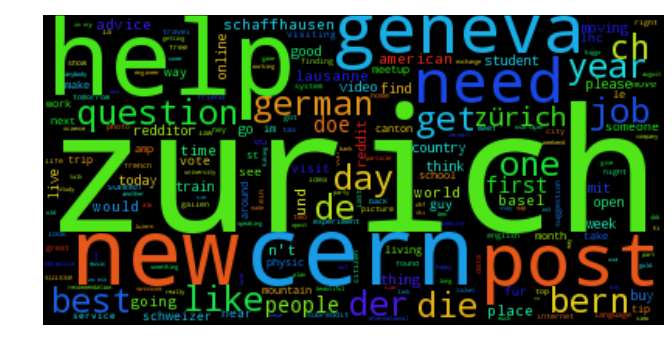

In [302]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
submissions = dfs_swiss['title'].astype('str').tolist()
subs_concat = ' '.join(submissions)

tokens = nltk.word_tokenize(subs_concat)

filter_token = [token.lower() for token in tokens if token not in string.punctuation ]


lemmatizer = WordNetLemmatizer()
lemanized = [lemmatizer.lemmatize(token) for token in filter_token]


subs_filtered = ' '.join(lemanized)
extended_stopwords=['swiss','switzerland','ha','wa','say', 'could','anyone','looking','know','want','schweiz','zurich','new'] + stopwords.words('english')
wordcloud = WordCloud(stopwords = extended_stopwords).generate(subs_filtered)
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("../figures/wordcloud_swiss.png")

### UK

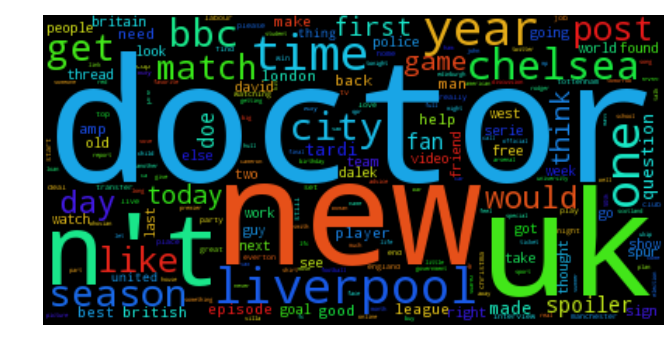

In [303]:
submissions = dfs_uk['title'].astype('str').tolist()
subs_concat = ' '.join(submissions)

tokens = nltk.word_tokenize(subs_concat)

filter_token = [token.lower() for token in tokens if token not in string.punctuation ]
lemmatizer = WordNetLemmatizer()
lemanized = [lemmatizer.lemmatize(token) for token in filter_token]

subs_filtered = ' '.join(lemanized)
extended_stopwords=['new','n\'t'] + stopwords.words('english')
wordcloud = WordCloud(stopwords = extended_stopwords).generate(subs_filtered)
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("../figures/wordcloud_uk.png")

### Germany

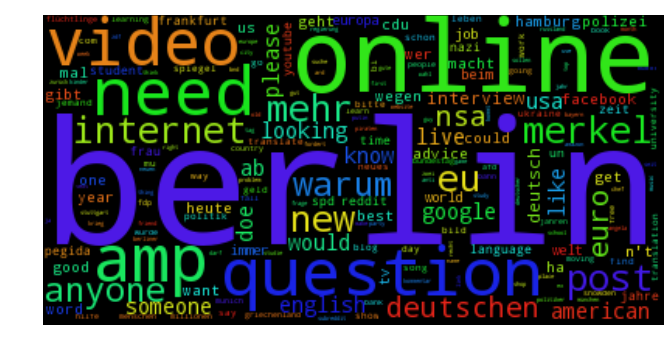

In [309]:
submissions = dfs_de['title'].astype('str').tolist()
subs_concat = ' '.join(submissions)

tokens = nltk.word_tokenize(subs_concat)

filter_token = [token.lower() for token in tokens if token not in string.punctuation ]
lemmatizer = WordNetLemmatizer()
lemanized = [lemmatizer.lemmatize(token) for token in filter_token]

subs_filtered = ' '.join(lemanized)
extended_stopwords=['german', 'germany', 'de', 'au', 'al', 'wa', 'help', 'neue', 'deutsche', 'deutschland', 'berlin'] + stopwords.words(['german','english'])
wordcloud = WordCloud(stopwords = extended_stopwords).generate(subs_filtered)
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("../figures/wordcloud_de.png")

### France

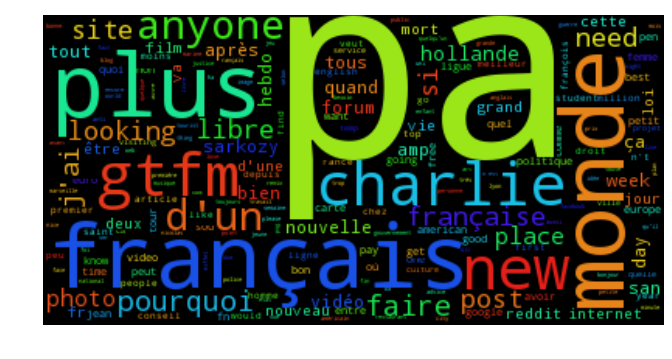

In [314]:
submissions = dfs_fr['title'].astype('str').tolist()
subs_concat = ' '.join(submissions)

tokens = nltk.word_tokenize(subs_concat)

filter_token = [token.lower() for token in tokens if token not in string.punctuation ]
lemmatizer = WordNetLemmatizer()
lemanized = [lemmatizer.lemmatize(token) for token in filter_token]

subs_filtered = ' '.join(lemanized)
extended_stopwords=['paris','plu','help','j\ai', 'france', 'french', 'pari','contre','question','pa' 'français', 'c\'est', 'fait', 'comment'] + stopwords.words(['French','English'])
wordcloud = WordCloud(stopwords = extended_stopwords).generate(subs_filtered)
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("../figures/wordcloud_fr.png")

### Spain

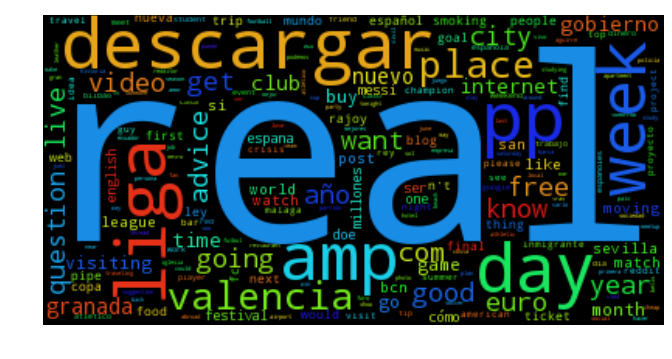

In [321]:
submissions = dfs_es['title'].astype('str').tolist()
subs_concat = ' '.join(submissions)

tokens = nltk.word_tokenize(subs_concat)

filter_token = [token.lower() for token in tokens if token not in string.punctuation ]
lemmatizer = WordNetLemmatizer()
lemanized = [lemmatizer.lemmatize(token) for token in filter_token]

subs_filtered = ' '.join(lemanized)
extended_stopwords=['need','best','online', 'barcelona', 'madrid', 'spain', 'spanish','anyone', 'help', 'looking', 'new', 'españa', 'gratis'] + stopwords.words(['Spanish','English'])
wordcloud = WordCloud(stopwords = extended_stopwords).generate(subs_filtered)
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("../figures/wordcloud_es.png")

### Italy

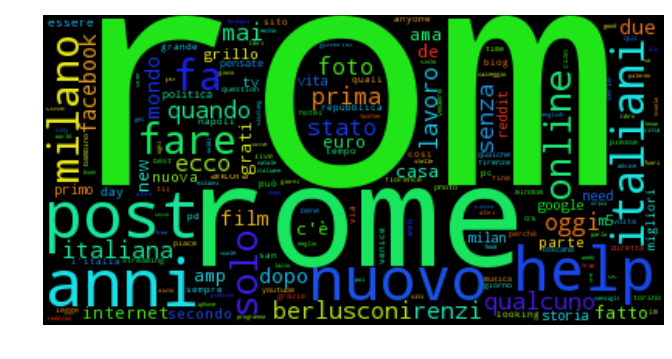

In [323]:
submissions = dfs_it['title'].astype('str').tolist()
subs_concat = ' '.join(submissions)

tokens = nltk.word_tokenize(subs_concat)

filter_token = [token.lower() for token in tokens if token not in string.punctuation ]
lemmatizer = WordNetLemmatizer()
lemanized = [lemmatizer.lemmatize(token) for token in filter_token]

subs_filtered = ' '.join(lemanized)
extended_stopwords=['italy','italian','italia','italiano', 'video', 'cosa'] + stopwords.words(['Italian', 'English'])
wordcloud = WordCloud(stopwords = extended_stopwords).generate(subs_filtered)
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("../figures/wordcloud_it.png")